In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/tkryu91/drive/main/S1_4_project_vgames2.csv"
raw_df = pd.read_csv(url)
raw_df.set_index('Unnamed: 0', inplace=True)
raw_df.reset_index(drop = True, inplace = True)
raw_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 데이터 전처리

## <span style = 'color : blue'> 데이터 확인 </span>

Year항목 - 결측치 확인, 이상한 데이터 확인  
지역별 Sales 항목 - 이상한 데이터 확인,   
Genre, Publisher 항목 - 결측치 확인
    
    

In [3]:
print("\n데이터타입\n", raw_df.dtypes)
print("\n결측치\n", raw_df.isnull().sum())
print("\n{} : \n{}".format("Platform", raw_df["Platform"].unique()))
print("\n{} : \n{}".format("Year", raw_df["Year"].unique()))
print("\n{} : \n{}".format("Genre", raw_df["Platform"].unique()))
print("\n{} : \n{}".format("NA_Sales", raw_df["NA_Sales"].unique()))
print("\n{} : \n{}".format("EU_Sales", raw_df["EU_Sales"].unique()))
print("\n{} : \n{}".format("JP_Sales", raw_df["JP_Sales"].unique()))
print("\n{} : \n{}".format("Other_Sales", raw_df["Other_Sales"].unique()))


데이터타입
 Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

결측치
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Platform : 
['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Year : 
[2.008e+03 2.009e+03 2.010e+03 2.005e+03 2.011e+03 2.007e+03 2.001e+03
 2.003e+03 2.006e+03 2.014e+03 2.015e+03 2.002e+03 1.997e+03 2.013e+03
 1.996e+03 2.004e+03 2.000e+03       nan 1.984e+03 1.998e+03 2.016e+03
 1.985e+03 1.999e+03 9.000e+00 9.700e+01 1.995e+03 1.993e+03 2.012e+03
 1.987e+03 1.982e+03 1.100e+01 1.994e+03 1.990e+03 1.500e+01 1.992e+03
 1.991e+03 1.983e

In [4]:
# 복사본 df 생성

df = raw_df.copy()

## <span style = 'color : blue'>  지역 별 Sales 항목

**지역 별 세일즈 단위 맞추기**  
- 기본 단위 : 백만(M)
- K, M 붙어있는 데이터 처리 (알파벳 없애고 K는 1000으로 나누기)

**숫자형태로 데이터 변환하기**

In [5]:
for i in range(0, len(df)): 
    for n in range (5,9):
        data = df.iat[i,n]
        if "K" in data:
            data = data.replace('K','')
            data = float(data)/1000
        elif "M" in data:
            data = data.replace('M','')
            data = float(data)
        df.iat[i,n] = data

areas = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for x in areas:
    df[x] = df[x].astype(float)

## <span style = 'color : blue'> Year 항목
**결측값 드랍**  
- 판매량이 큰 항목이 없으므로 드랍해도 분석에 영향을 주지 않을 것

**단위 맞추기**
- 두자리수로 된 연도 네자리로 바꾸기
- 50 이하면 +1900해서 1900년도로, 50이상이면 +2000해서 2000년도로
    
**2017년 이후 데이터 드랍** 
- 데이터가 완전치 않으므로 2017이후의 데이터는 드랍하고 2016년까지만 분석 
- (2017년 데이터 3개, 2020년 데이터 1개)

In [6]:
df.dropna(subset = ['Year'], inplace=True)
df.reset_index(inplace = True, drop=True)

df['Year'] = df['Year'].astype(int)

df["Year"].isnull().sum()

0

In [7]:

for i in range(1, len(df)):
    year = df.loc[i, 'Year']
    
    if len(str(year )) <= 2:
        if year > 50 : year += 1900
        elif year < 50 : year += 2000
        df.loc[i,"Year"] = year
        
    else : continue


In [8]:
df['Year'][df['Year'] > 2015].value_counts()

2016    344
2017      3
2020      1
Name: Year, dtype: int64

In [9]:
df[df['Year'] >=2017].index

Int64Index([5223, 6797, 9955, 14981], dtype='int64')

In [10]:
df.drop(df[df['Year'] >=2017].index, axis = 0, inplace = True)

In [11]:
df['Year'][df['Year'] > 2015].value_counts()

2016    344
Name: Year, dtype: int64

## <span style = 'color : blue'> Total_Sales 항목 추가

In [12]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


## <span style = 'color : blue'> Platform 항목 </span>

**플랫폼 분석을 위하여 플랫폼 항목을 'Nintendo', 'Play Station', 'X-Box', 'PC', 'ETC'로 통일**
- 추후 각 플랫폼 기기의 점유율 변화 확인
- 추후 기기의 종류에 따른 분류는 하지 않음 (거치형 vs 모바일) 

In [13]:
df2 = df.copy()
df2['Platform'].replace('DS', 'Nintendo', inplace=True)
df2['Platform'].replace('Wii', 'Nintendo', inplace=True)
df2['Platform'].replace('3DS', 'Nintendo', inplace=True)
df2['Platform'].replace('WiiU', 'Nintendo', inplace=True)
df2['Platform'].replace('NES', 'Nintendo', inplace=True)
df2['Platform'].replace('GB', 'Nintendo', inplace=True)
df2['Platform'].replace('GBA', 'Nintendo', inplace=True)
df2['Platform'].replace('N64', 'Nintendo', inplace=True)
df2['Platform'].replace('SNES', 'Nintendo', inplace=True)

df2['Platform'].replace('PSP', 'Play_Station', inplace=True)
df2['Platform'].replace('PS3', 'Play_Station', inplace=True)
df2['Platform'].replace('PS', 'Play_Station', inplace=True)
df2['Platform'].replace('PS2', 'Play_Station', inplace=True)
df2['Platform'].replace('PSV', 'Play_Station', inplace=True)
df2['Platform'].replace('PS4', 'Play_Station', inplace=True)

df2['Platform'].replace('XB', 'X_Box', inplace=True)
df2['Platform'].replace('X360', 'X_Box', inplace=True)
df2['Platform'].replace('XOne', 'X_Box', inplace=True)

df2['Platform'].replace('GC', 'ETC', inplace=True)
df2['Platform'].replace('2600', 'ETC', inplace=True)
df2['Platform'].replace('SAT', 'ETC', inplace=True)
df2['Platform'].replace('DC', 'ETC', inplace=True)
df2['Platform'].replace('GEN', 'ETC', inplace=True)
df2['Platform'].replace('SCD', 'ETC', inplace=True)
df2['Platform'].replace('WS', 'ETC', inplace=True)
df2['Platform'].replace('NG', 'ETC', inplace=True)
df2['Platform'].replace('TG16', 'ETC', inplace=True)
df2['Platform'].replace('3DO', 'ETC', inplace=True)
df2['Platform'].replace('GG', 'ETC', inplace=True)
df2['Platform'].replace('PCFX', 'ETC', inplace=True)



df2['Platform'].unique()

array(['Nintendo', 'Play_Station', 'PC', 'X_Box', 'ETC'], dtype=object)

In [14]:
df3 = df.copy()
# df3.replace({'Platform' : {'DS','GB' : 'Nintendo'}})
df3['Platform'].replace(['DS','Wii','3DS','WiiU','NES','GB','GBA','N64','SNES'], 'Nintendo', inplace=True)
df3['Platform'].replace(['PSP','PS3','PS','PS2','PSV','PS4'], 'Play_Station', inplace=True)
df3['Platform'].replace(['XB', 'X360', 'XOne'], 'X_Box', inplace=True)
df3['Platform'].replace(['GC','2600','SAT','DC','GEN','SCD','WS','NG','TG16','3DO','GG','PCFX'], 'ETC', inplace=True)
df3.Platform.unique()

array(['Nintendo', 'Play_Station', 'PC', 'X_Box', 'ETC'], dtype=object)

# 데이터 분석
## <span style = 'color : blue'> 연도 별 인기 장르 확인 </span>
**연도 - 장르 별 total sales 형태로 표 바꾸기**
 - 방법 1 : pd.crosstab
 - 방법 2 : pd.pivot_table 
 - 방법 3 : groupby & unstack

<span style = 'color : red'> *어떤 시각화 자료를 써야 연도별 인기 장르가 잘 보일까?  
    라인 그래프 = 라인 개수가 너무 많아 전체적인 파악이 힘듦  
    누적 그래프 (area, bar) = 전체 판매량의 변화는 잘 보이지만, 장르별로 어떤 것이 우세한지 파악 안됨  
    바 그래프 = 바의 개수가 너무 많아 파악이 힘듦*  
    
<span style = 'color : red'> ***라인 그래프 + 투명도 조절 = 나쁘지 않음***  
<span style = 'color : red'> ***히트맵 = 나쁘지 않음***

In [15]:

year_genre = pd.crosstab(index = df['Year'], columns = df['Genre'], values= df['Total_Sales'],aggfunc='sum')
year_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1981,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.04,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.58,NaN
1987,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
1988,1.74,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


In [16]:
year_genre2 = df.pivot_table(index = 'Year', columns = "Genre", values = 'Total_Sales', aggfunc = 'sum')
year_genre2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1981,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.04,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.58,NaN
1987,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
1988,1.74,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


In [17]:
year_genre_group = df.groupby(['Year','Genre']).Total_Sales.sum()
year_genre3 = year_genre_group.unstack()

<AxesSubplot:xlabel='Year'>

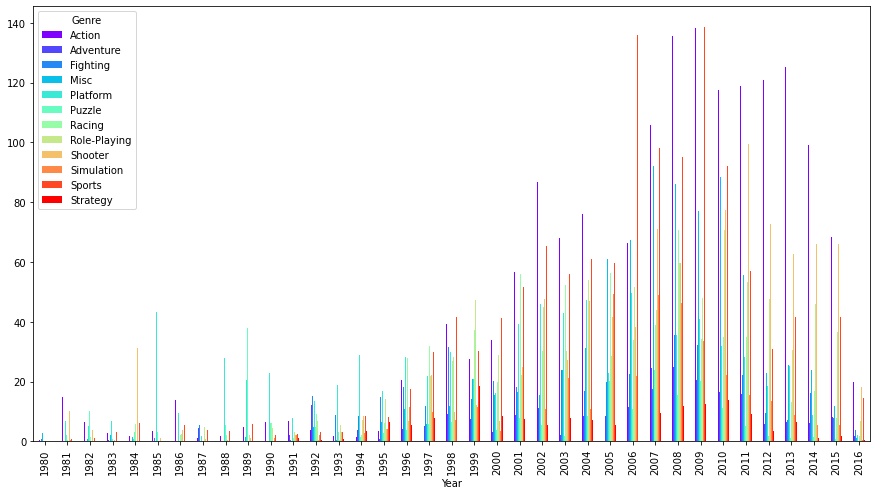

In [18]:

year_genre.plot(kind = 'bar', colormap = 'rainbow', figsize = (15,8))

<AxesSubplot:xlabel='Year'>

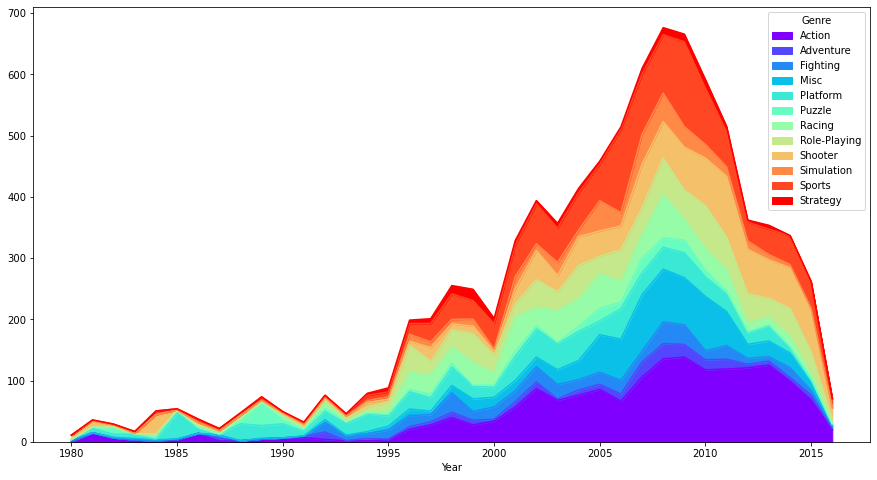

In [19]:
year_genre.plot(kind = 'area', stacked=True, colormap = 'rainbow', figsize = (15,8))

<AxesSubplot:xlabel='Year'>

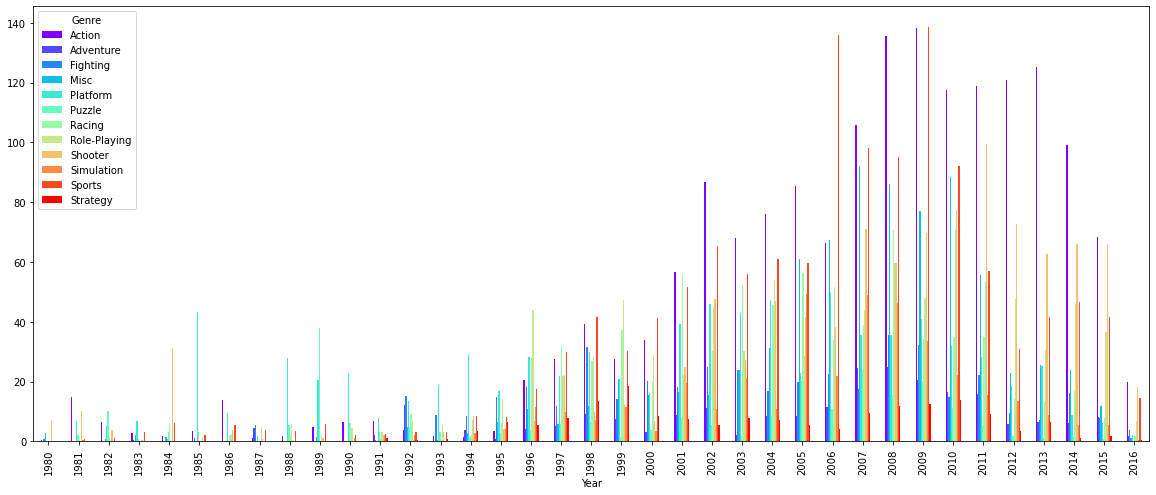

In [20]:
year_genre.plot(kind = 'bar', colormap = 'rainbow', figsize = (20,8))

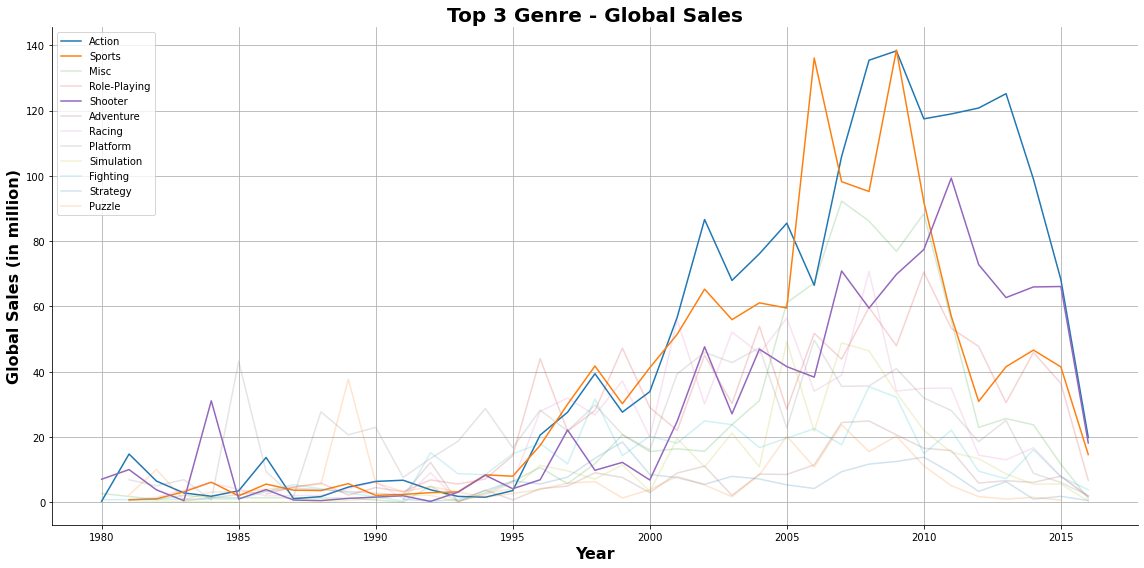

In [21]:
genre_list = df['Genre'].value_counts().index.to_list()

fig, ax = plt.subplots(figsize = (16,8))

top3 = ['Action', 'Shooter', 'Sports']

for gr in genre_list:
    gr_cond = (df['Genre'] == gr)
    
    #top 3를 제외한 나머지 투명도 조정
    if gr in top3:
        alpha = 1
    else:
        alpha = 0.2

    plt.plot('Year','Total_Sales',data =  pd.DataFrame(df[gr_cond].groupby(by = ['Year'])[['Total_Sales']].sum()).reset_index(), label = gr, alpha = alpha)


font_title = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Top 3 Genre - Global Sales", fontdict = font_title)

font_text = {
    'color':  'black',
    'weight': 'bold',
    'size': 16
         }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Year",fontdict = font_text)


for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)


ax.grid(True)
# ax.set_facecolor('#f4f0ea')
plt.legend()
fig.tight_layout()
plt.show()

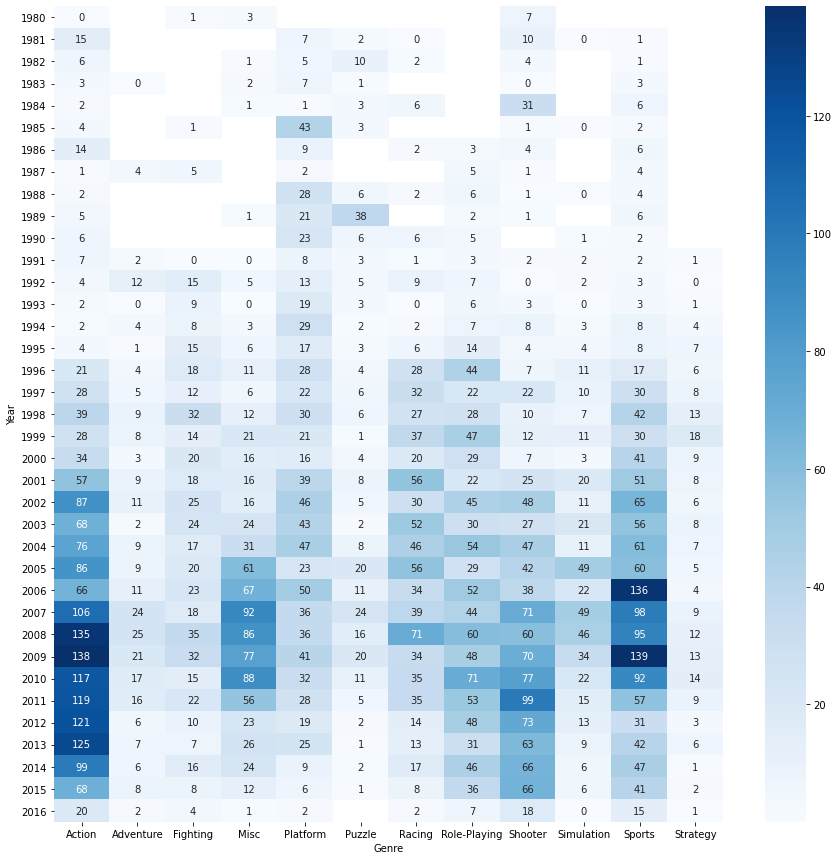

In [22]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(year_genre, cmap='Blues', annot = True, fmt = '.0f');

## <span style = 'color : blue'> 연도 별 인기장르 확인 2
**5년 단위로 연도 구간 나누어서 구간 별 top3 뽑기**


**기존 방법**
- 나눈 구간(시기)별로 데이터셋 나누기
- 구간별 top3 장르 뽑아서 새로운 데이터셋 만들기


In [23]:
# pd.cut으로 구간을 나누어 라벨링

bins = list(range(1980, 2021, 5))
bins_label = [str(x) + "~" + str(x+5) for x in bins]


df['period'] = pd.cut(df['Year'], bins, right=False, labels=bins_label[:-1])
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,period
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2005~2010
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2005~2010
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010~2015
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010~2015
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010~2015


In [24]:
# 구간별 데이터셋, 
# 구간별 top3 장르의 데이터셋 - 구간 각각의 데이터셋

period_list1 = ['year_80_85', 'year_85_90', 'year_90_95', 'year_95_00', 'year_00_05', 'year_05_10', 'year_10_15', 'year_15_20']
for x, y in zip(period_list1, bins_label[:-1]) :
    globals()["{}".format(x)] = df.query('period == "{}"'.format(y))
    temp = globals()["{}".format(x)]
    globals()["{}_top".format(x)] = pd.DataFrame(temp.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(3))
    temp2 = globals()["{}_top".format(x)]
    temp2['Period'] = y
    
year_80_85_top

,Total_Sales,Period
Genre,,
Shooter,52.49,1980~1985
Action,26.34,1980~1985
Platform,19.57,1980~1985


In [51]:
len(year_85_90.query("Genre =='Platform'"))

19

In [52]:
# 데이터셋 통합, 

period = pd.concat([year_80_85_top, year_85_90_top, year_90_95_top, year_95_00_top, year_00_05_top, year_05_10_top, year_10_15_top, year_15_20_top])
period.reset_index(inplace=True)
period = period[['Period', 'Genre', 'Total_Sales']]


# count, mean 추가
## genre_counts 리스트를 만들고, 각 구간/장르별 길이를 구해서 append.
genre_counts = list()

for x in period_list1:
    for i in range(0,3):
        temp1 = globals()[x]
        temp2 = globals()["{}_top".format(x)]
        var = temp2.index[i]
        genre_counts.append(len(temp1.query("Genre == '{}'".format(var))))


period['Counts'] = genre_counts
period['Mean'] = period['Total_Sales'] / period['Counts']

period.head()

,Period,Genre,Total_Sales,Counts,Mean
0,1980~1985,Shooter,52.49,21,2.499524
1,1980~1985,Action,26.34,52,0.506538
2,1980~1985,Platform,19.57,14,1.397857
3,1985~1990,Platform,102.69,19,5.404737
4,1985~1990,Puzzle,46.54,10,4.654000


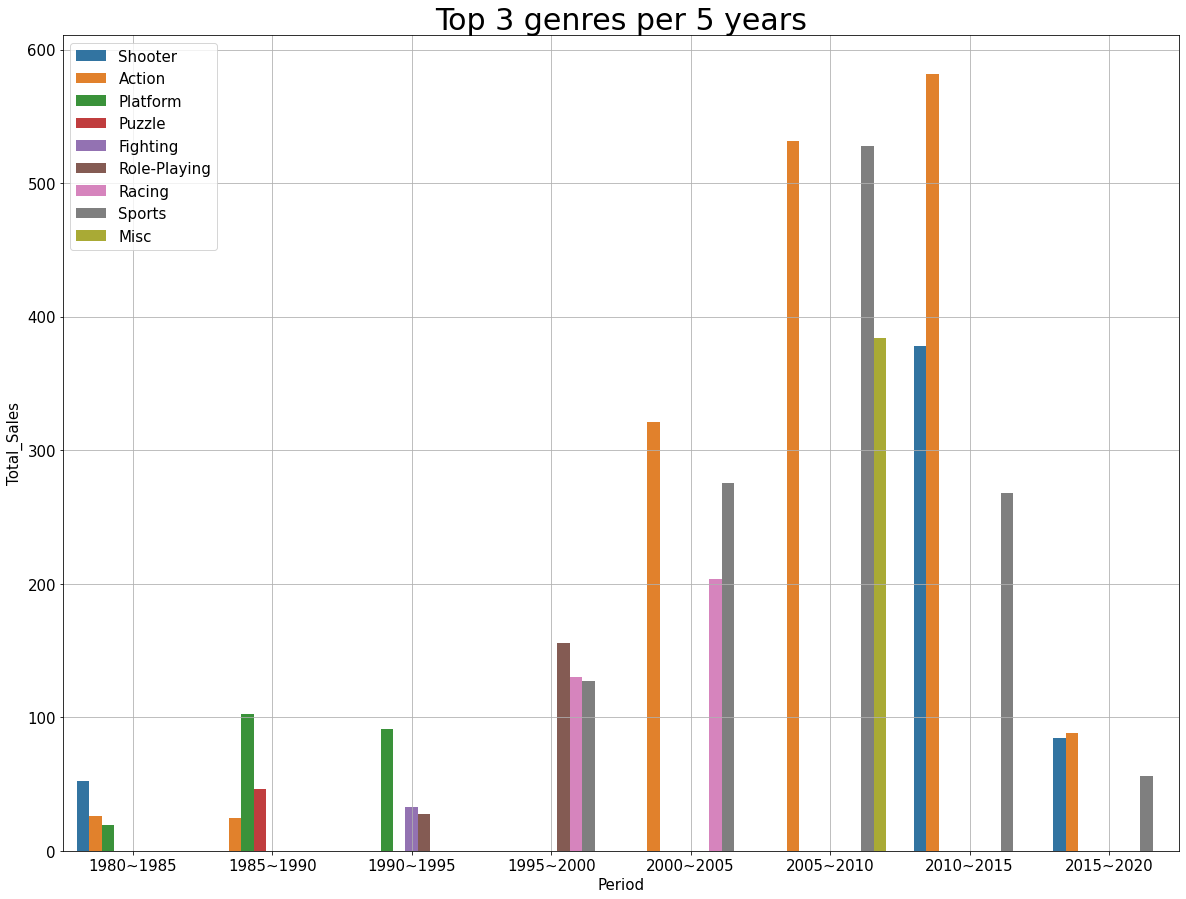

In [26]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 15

sns.barplot(data=period, x = 'Period', y = 'Total_Sales',hue = 'Genre')
plt.xlabel('Period')
plt.title("Top 3 genres per 5 years", fontsize=30)

plt.rcParams['font.size'] = 15

plt.legend(loc =2)

plt.grid()


**위 차트를 통해 Action, Sports, Shooter 장르가 최근 유행중임을 알 수 있음**

**아래 box plot을 통해 action의 평균 세일즈(출시량 대비 판매량)는 좋지 못함을 알 수 있음**  
**평균 판매량이 좋은 장르는 Platform, Shooter**

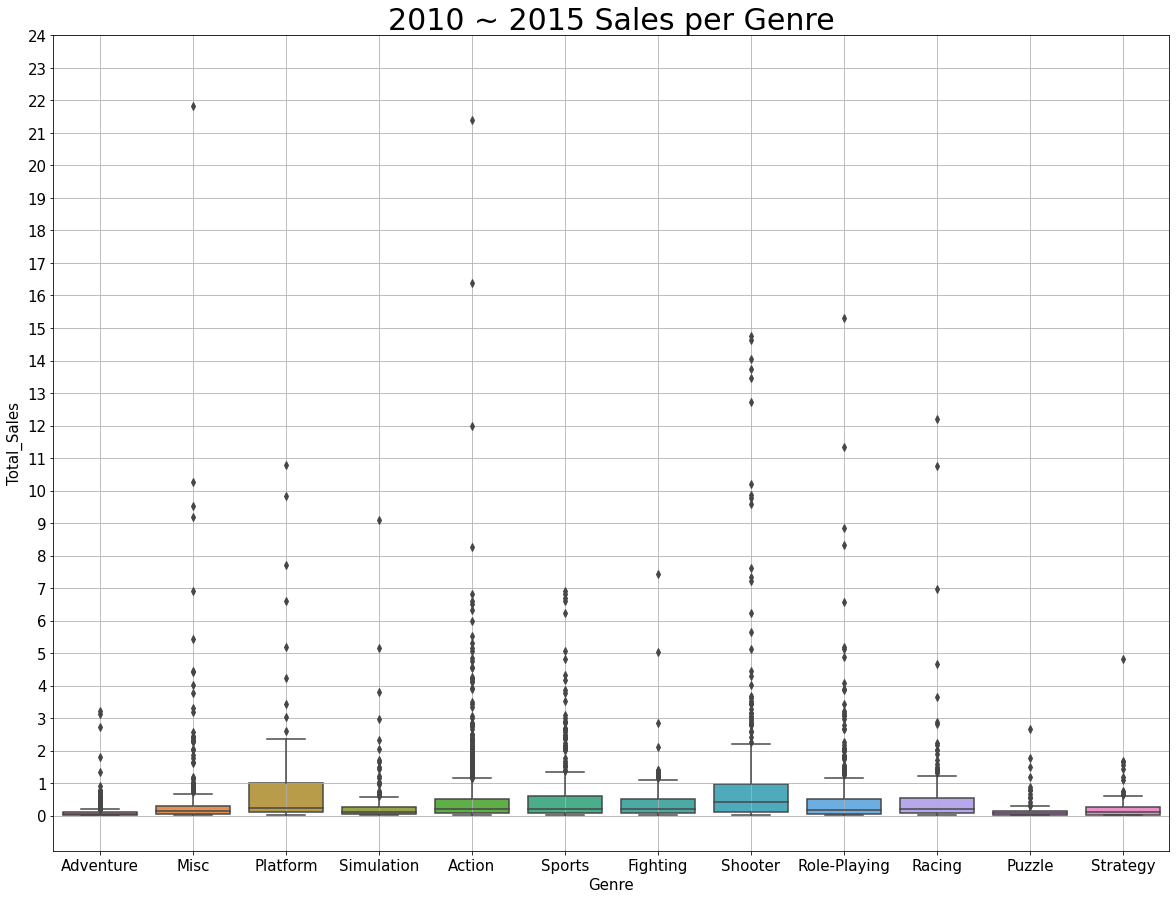

In [56]:
sns.boxplot(x = year_10_15["Genre"], y = year_10_15["Total_Sales"])
plt.yticks(np.arange(0,25));
plt.grid()
plt.title("2010 ~ 2015 Sales per Genre", fontsize = 30)
plt.show()

**새로운 방법**  
**crosstab 활용해서 구간/장르별 판매량 데이터셋 만들기**

In [31]:
pd_cross1 = pd.crosstab(index = df['Year'], columns = df['Genre'], values= df['Total_Sales'],aggfunc='sum').fillna(0)

year = ['1980~1984','1985~1989','1990~1994','1995~1999','2000~2004','2005~2009','2010~2014']

pd_cross0 = pd_cross1.T

k = 1980
for i in year:
    pd_cross0[i] = pd_cross0[k]+pd_cross0[k+1]+pd_cross0[k+2]+pd_cross0[k+3]+pd_cross0[k+4]
    k+=5

pd_cross0['2015~2019'] =  pd_cross0[2015]+pd_cross0[2016]
pd_cross0 = pd_cross0.iloc[:,-8:].T
pd_cross0

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980~1984,26.34,0.40,0.77,7.16,19.57,16.21,8.00,0.00,52.49,0.44,11.21,0.00
1985~1989,24.76,4.38,6.47,1.28,102.69,46.54,4.10,15.25,7.28,0.07,20.57,0.00
1990~1994,20.35,18.29,32.84,8.18,91.46,18.77,18.98,27.36,13.65,8.33,19.06,5.68
1995~1999,118.80,26.51,90.67,55.25,117.41,20.17,129.83,155.41,55.24,43.71,127.41,51.83
2000~2004,321.35,33.74,103.83,102.52,191.49,27.22,203.77,180.39,153.30,65.83,275.09,36.66
2005~2009,531.78,90.03,127.43,383.72,184.64,90.64,234.23,231.81,280.15,199.81,527.72,43.16
2010~2014,581.53,51.05,69.90,216.49,112.62,20.50,114.06,248.08,378.35,64.98,268.16,33.47
2015~2019,88.10,9.82,11.63,12.81,8.13,0.69,9.59,43.18,84.29,6.00,56.12,2.34


<AxesSubplot:xlabel='Year'>

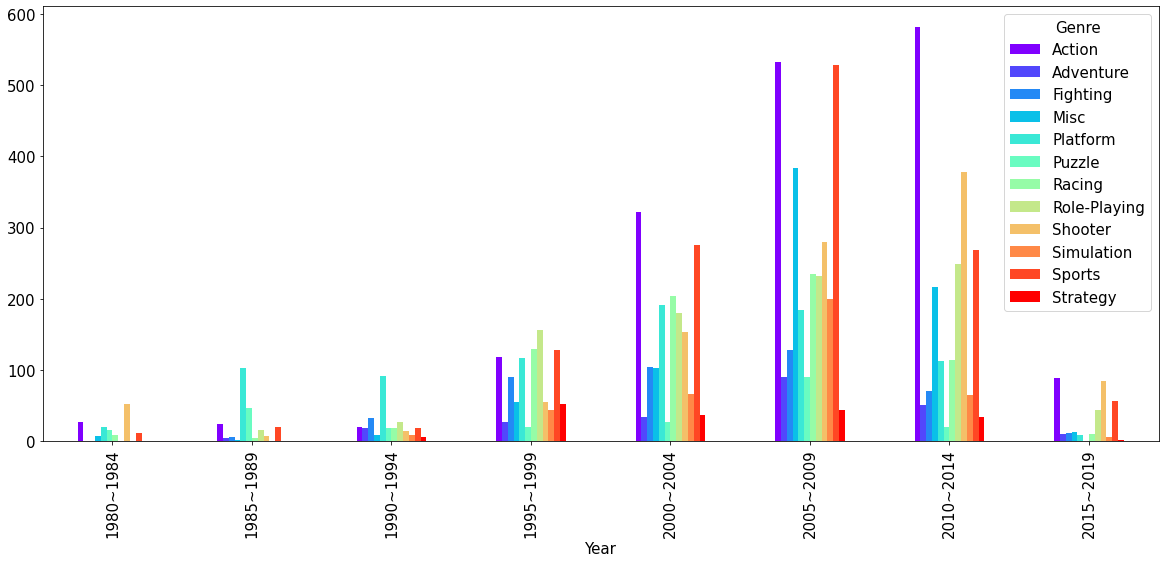

In [57]:
pd_cross0.plot(kind = 'bar', colormap = 'rainbow', figsize = (20,8))

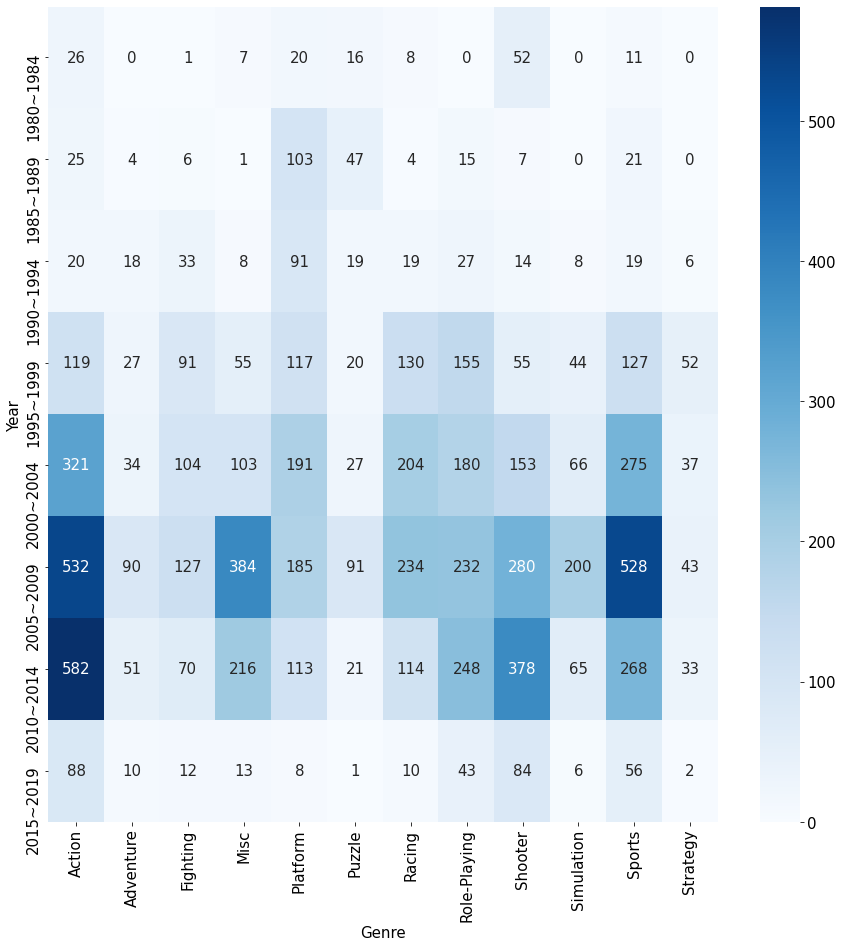

In [58]:
plt.figure(figsize = (15,15))
sns.heatmap(pd_cross0, cmap='Blues', annot = True, fmt = '.0f');

--------


------------------

### 연습장


In [32]:
xx = pd.DataFrame(pd_cross0.iloc[0,:].sort_values(ascending = False).head(3))
xx.reset_index(inplace=True)

xx2 = pd.DataFrame(pd_cross0.iloc[1,:].sort_values(ascending = False).head(3))
xx2.reset_index(inplace=True)

xx3 = pd.DataFrame(pd_cross0.iloc[2,:].sort_values(ascending = False).head(3))


In [33]:
xx2

,Genre,1985~1989
0,Platform,102.69
1,Puzzle,46.54
2,Action,24.76


In [34]:
xx2.columns[1]

'1985~1989'

In [35]:
xx2['period'] = xx2.columns[1]
xx2

,Genre,1985~1989,period
0,Platform,102.69,1985~1989
1,Puzzle,46.54,1985~1989
2,Action,24.76,1985~1989


In [36]:
for x in year:
    print(x)

1980~1984
1985~1989
1990~1994
1995~1999
2000~2004
2005~2009
2010~2014


In [37]:
period_num_list = list(range(1980,2016,5))
period_name_list = list()

for x in period_num_list :
    period_name_list.append("{}_{}".format(x, x+5))

period_name_list

['1980_1985',
 '1985_1990',
 '1990_1995',
 '1995_2000',
 '2000_2005',
 '2005_2010',
 '2010_2015',
 '2015_2020']

In [38]:
for x, y in zip(range(0, len(pd_cross0)), period_name_list):
        globals()['period_{}'.format(y)] = pd.DataFrame(pd_cross0.iloc[x,:].sort_values(ascending = False).head(3))

# period = pd.DataFrame(period_1980_1985, period_1985_1990)
# period
# for x in range(0, len(pd_cross0)):
# pd.concat()

In [39]:
period = pd.concat([period_1980_1985, period_1985_1990])
period

,1980~1984,1985~1989
Genre,,
Shooter,52.49,NaN
Action,26.34,NaN
Platform,19.57,NaN
Platform,NaN,102.69
Puzzle,NaN,46.54
Action,NaN,24.76


In [40]:
period_1985_1990

,1985~1989
Genre,
Platform,102.69
Puzzle,46.54
Action,24.76


<BarContainer object of 3 artists>

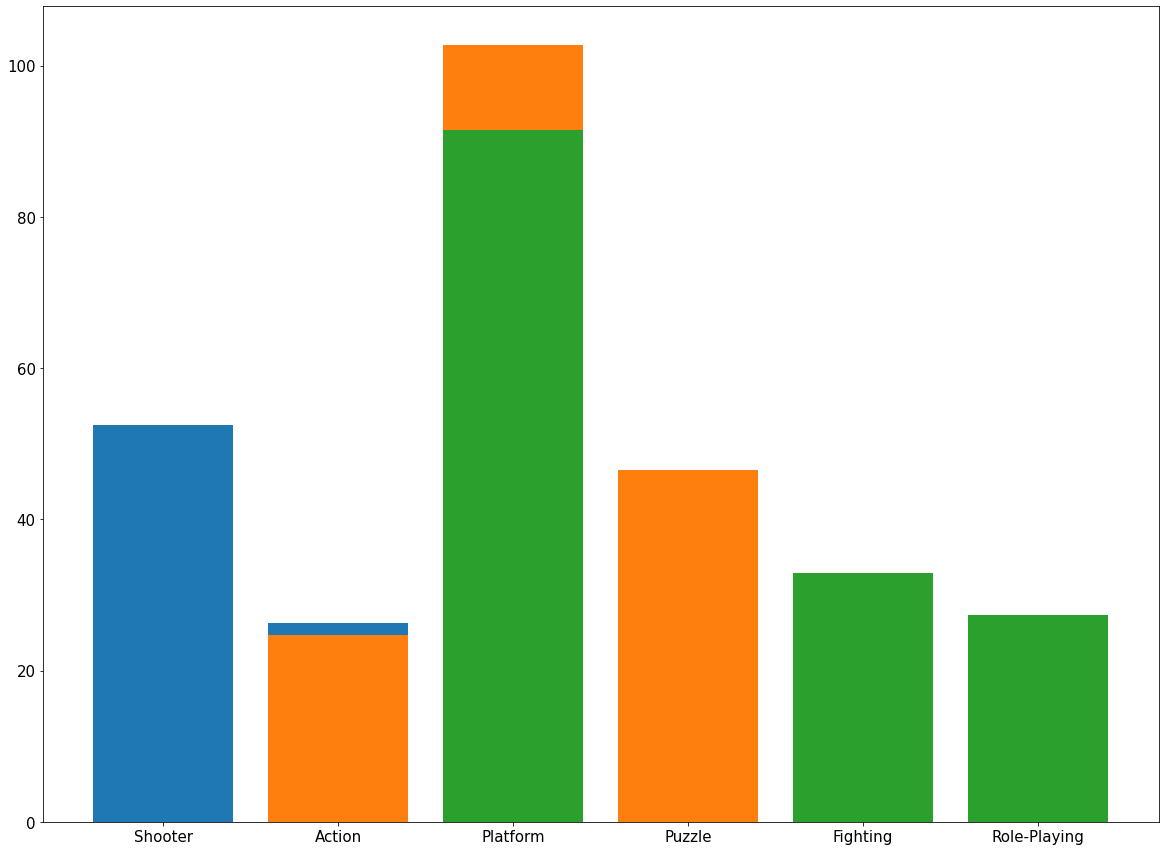

In [41]:
# fig, axes = plt.subplots(figsize = (15, 8))
plt.bar(xx['Genre'], xx['1980~1984'])
plt.bar(xx2['Genre'], xx2['1985~1989'])
plt.bar(xx3.index, xx3['1990~1994'])

<AxesSubplot:>

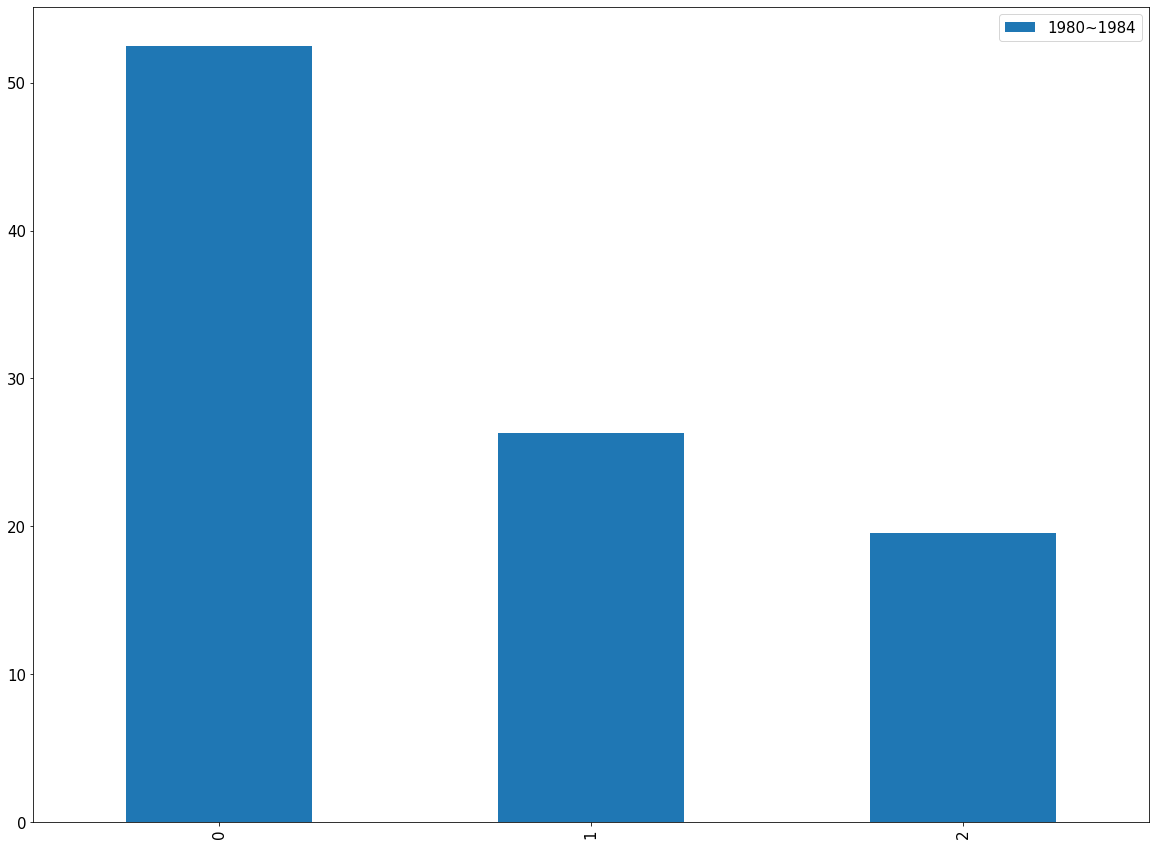

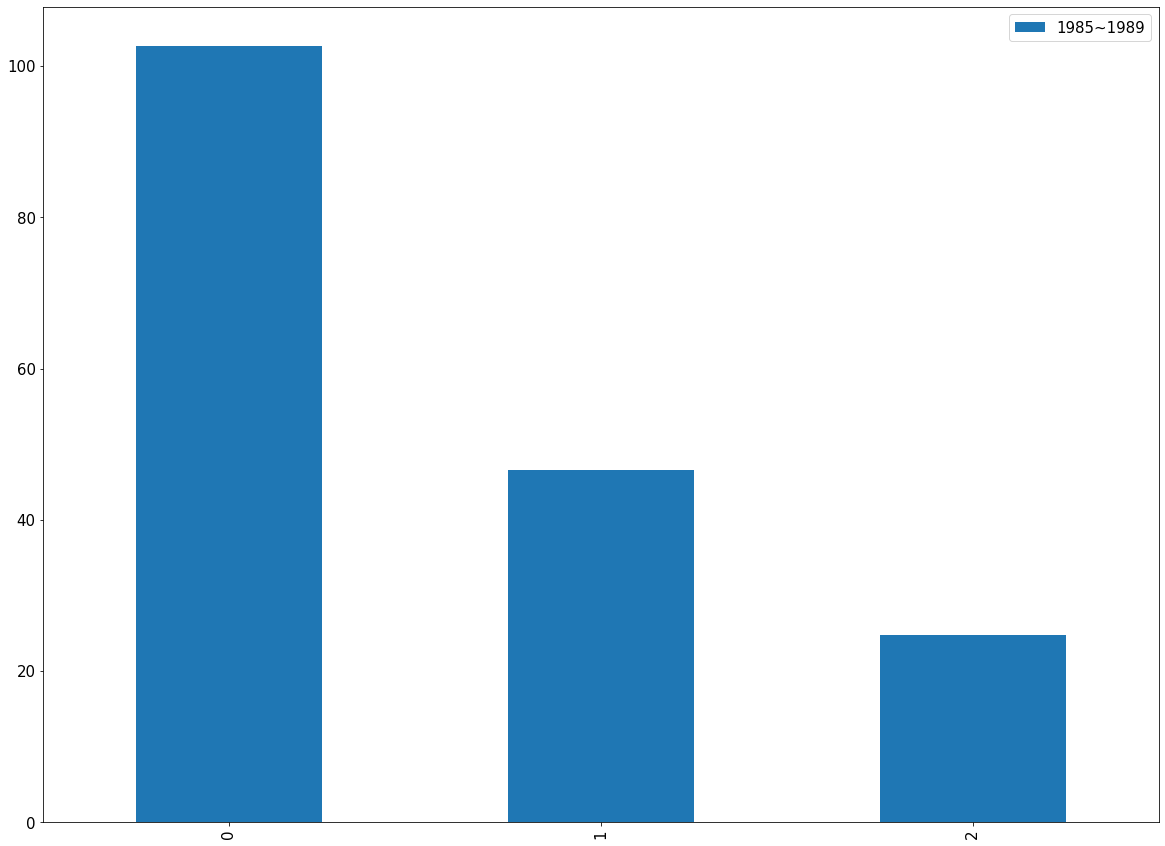

In [42]:
xx.plot(kind = 'bar')
xx2.plot(kind = 'bar')

In [43]:
xx.index

RangeIndex(start=0, stop=3, step=1)

In [44]:
sss = df.groupby(df['Year']).sum()
sss

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,19.81,1.93,37.08
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


In [45]:
ss = raw_df.groupby(raw_df['Genre'])
ss[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.040.170.070.040.140.190.11060K0.130.180.080....,0000.030.160.20.0100.080.0200.0400.010.060.030...,000.1100000.050.160000000000000.080.02000.0400...,00.010.010.010.060.050.0100.030.020.010.010.01...
Adventure,000.330.080.050.180000.19000.170.0100000.120.3...,000.050.140.040000.020.41000.060.0400.03000.05...,0.020.040.250000.120.02000.020.02000.0200.030....,000.040.050.020.010000.220000.0100000.020.0400...
Fighting,0.4800.131.98000.190.010.0700.010.020.060000.2...,0.5300.030.550K00.1300.010.050.01000000.060.02...,0.010.37000.010.4600000000.210.040.06000.010.0...,0.23000.3200.030.0200.0100000.010.0300.010.080...
Misc,0.040.051.9300.050.2500.040.050.210.04000.4300...,000.34000.0700.010.0200.010.010000.02003.150.0...,0000.01000.03000.02000.0600.0400.020.05000.160...,000.21000.030000.020000.0300001.0700.010.010.0...
Platform,0.120.570.0200.2900.5200.350.190.220.170.0200....,0.090.450.0100.2200.0600.240.050.1500000000.01...,0000.0800.070.410.51000K000.1700.150.020.14000...,0.040.15000.0800.0500.040.010.030.0100000.0100...
Puzzle,0.020.180.10.040.100.040.180.280.2600.07000.04...,000000.010.010.120.0100.060000.010.085.36000.2...,00.850000000.030.31000.570.62005.321.07000.160...,000.0100.01000.020.020.020.010.010000.041.180....
Racing,480K0.030.140.260.1400000.040.130.350K0.031.23...,0.33M0.020.10.010.090.0400.0400.030.020.430.02...,0K000000.0100.0200000000000.0300000.0700000.02...,0.0600.0200.020.0100.01000.010.07000.340.010.0...
Role-Playing,000.020.30.130000.04000.50.94000.2000.01000.03...,0.02000.20.1000.030000.630.35000.140000.0300.0...,00.020.030.30.040.891.17000.030.04001.250.154....,0000.060.020000000.10.02000.020000.010.01M0.01...
Shooter,00.120.510.250.010.080.070.070.360.045.9100.02...,0.230.010.330.1700.070.020.020.210.032.381.120...,00.020.010.01000K00.0100.1300000000.010.050000...,0.060.010.080.050M0.010.0200.060.010.90.0300.0...


In [46]:
year_NA = raw_df.groupby(['Year'])
year_NA[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
0.0,00.050.01,00.030.01,0.200,00.010
1.0,0.340.77,0.270.6,00,0.090.2
2.0,0.0100.06,000.05,00.070,000.02
3.0,0.531.440.010.360.010.020.13,0.410.8300.080.240.010.03,00.2600M000,0.140.2500.020.0500
4.0,0.40.160.10,0.120.040.080,0000.05,0.020.010.030
...,...,...,...,...
2014.0,000.080.050000.020.350.0400.360.0100.090.2400....,00.010.140.0400.030.0100.4350K00.35000.120.340...,0.030000.0800000.040.1700.110.090.0600000.190....,000.050.0200000.070.0200.14000.050.050.0300.04...
2015.0,0.02060K0.0800.500.14000.020.090.0800.26000.02...,000.080.070.060.6300.0500.010.010.08000.160.09...,0.030.010.160000.050.010.0300.050.0600.0300.19...,000.030.010.020.100.02000.010.020.0100.040.010...
2016.0,00000.040.0200000.4800000.03000.040.0200.170.2...,0.0400000.0600.0500.010.3000.040.010.090.0100....,00.120.170.2200.010.0100.0100.080.010.0100000....,0.010000.010.0200000.08000.0100.01000.01000.03...


In [47]:
name_list = ['a','b','c']

for i in name_list:
    globals()['df_{}'.format(i)]  = 1+3
    

df_a

4